In [119]:
import numpy as np
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import animation
#Importing data
data_x = np.genfromtxt('../data/q1/linearX.csv', delimiter=',')
data_x = data_x.reshape(-1,1)
data_y = np.genfromtxt('../data/q1/linearY.csv', delimiter=',')
data_y = data_y.reshape(-1,1)

#Normalizing the vector data_X
mean = np.mean(data_x, axis = 0)
std = np.std(data_x, axis = 0)
norm_x = (data_x-mean)/std #normalized data_x
#size of dataset
(m,n) = norm_x.shape

#Adding the intercept term to norm _x
intercept = np.ones(m).reshape(-1,1)
data_x = np.concatenate((intercept, norm_x), axis=1)
#Now the training data is data_x(mXn) and data_y(mX1)

#size of dataset
(m,n) = data_x.shape

data_x_trans = data_x.T


In [120]:
#Helper Functions

#Cost of a given prediction vector
def cost(pred):
    error = data_y - pred
    error = error*error
    return (np.sum(error)/(2*m))

#Prediction for a given theta and x
def prediction(theta, x):
    return np.matmul(x,theta)

#Loss{J(theta)} for a given set of parameters
def loss(theta):
    return cost(prediction(theta, data_x))

# predict value of a given x
def predict(theta, x):
    return theta[0][0] + theta[1][0]*x

In [121]:
#Train the model with the given learning rate (eta)

def learn_model(eta):
    #The parameter Vector theta and initializing it
    theta = np.zeros(n).reshape(-1,1)
#     theta = np.asarray([[0.5],[0.5]])
    #Progress vector that would store theta and cost associtaed with it after every updation
    progress = []
    for i in range(1,101):
        pred = prediction(theta, data_x)
        progress.append([i, cost(pred), theta[0][0], theta[1][0]])
        error = pred - data_y
        coeff = np.matmul(data_x_trans, error)
        theta = theta - eta*coeff
    return theta, progress

In [122]:
#Q1 part(a)

print("Learning rate=", 0.001)
theta, progress = learn_model(0.001)
print("The parameters obtained is")
print(theta)

Learning rate= 0.001
The parameters obtained is
[[0.99659363]
 [0.00134016]]


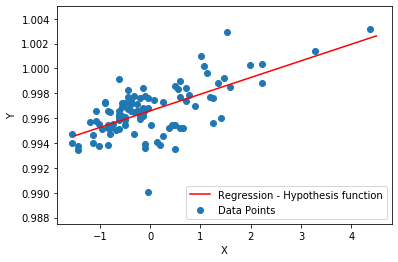

In [123]:
#Q1 part(b) - Plotting data set and hypothesis function
plt.figure(1)
plt.scatter(data_x[:,1], data_y, label='Data Points')
x = np.linspace(-1.5,4.5,100)
y = theta[1][0]*x + theta[0][0]
plt.plot(x, y, '-r', label='Regression - Hypothesis function')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='lower right')
plt.ylim(0.9875, 1.005)
plt.show()

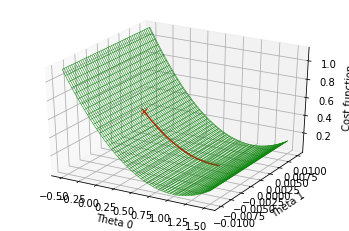

In [124]:
#Q1 part(c) Creating a 3d mesh and showing movement of J(theta) along it
progress = np.asarray(progress)

fig = plt.figure(2)
x,y = np.linspace(-0.5,1.5,100), np.linspace(-0.01,0.01,100)
X,Y = np.meshgrid(x,y)
#To store value of cost associated with each theta
z=[]
for (i,x_i) in enumerate(X):
    l = []
    for(j, x_j) in enumerate(x_i):
        l.append(loss(np.asarray([[x_j],[Y[i][j]]])))
    z.append(l)
z = np.asarray(z)

#Plot X,Y, and Z in form of a mesh
ax = plt.axes(projection='3d')
ax.plot_wireframe(X,Y,z, color='green', linewidth=0.5)
ax.set_xlabel("Theta 0")
ax.set_ylabel("Theta 1")
ax.set_zlabel("Cost function")

#Extract set of parameters and cost at each iteration of the gradient descent
t0, t1, J = progress[:,2], progress[:,3], progress[:,1]
#Plot the line in 3D
ax.plot3D(t0,t1,J,'r')

#Start plotting movement of the point at each iteration, displaying it in form of animation
ln1, = ax.plot([t0[0]], [t1[0]],[J[0]], 'x', c='red')

#Update function for animation
def update(i,x,y,z,ln1):
    ln1.set_data(np.asarray([x[i],y[i]]))
    ln1.set_3d_properties(z[i], 'z')
    return ln1

#Animating the movement and saving it in a file
ani = animation.FuncAnimation(fig, update, t0.shape[0], fargs=(t0,t1,J,ln1))
writer = animation.writers['ffmpeg'](fps=5)
dpi = 200
ani.save('video3d.mp4',writer=writer,dpi=dpi)
plt.show()

In [125]:
# To draw contours for different learning rates
def draw_contours(name, progress, xlo, xhi, ylo, yhi):
    #Same function as in animate 3d part
    fig = plt.figure()
    x,y = np.linspace(xlo,xhi,100), np.linspace(ylo,yhi,100)
    X,Y = np.meshgrid(x,y)
    z = []

    for (i,x_i) in enumerate(X):
        l = []
        for(j, x_j) in enumerate(x_i):
            l.append(loss(np.asarray([[x_j],[Y[i][j]]])))
        z.append(l)
    z = np.asarray(z)
    
    #Darw the contours
    plt.contour(X,Y,z)
    plt.xlabel('Theta 0')
    plt.ylabel('Theta 1')
    plt.title('for '+name)
    
    #Extract the movement of parameters in each iteration of gradient descent
    t0, t1 = progress[:,2], progress[:,3]
    
    #Start plotting movement of the point at each iteration, displaying it in form of animation
    xd, yd = [],[]
    ln, = plt.plot([], [], 'bo')
    
    #Update function for animation
    def update(i):
        ln.set_data(t0[:i], t1[:i])
        return ln,
    
    #Animating the movement and saving it in a file
    ani = animation.FuncAnimation(fig, update, frames=t0.shape[0], interval=25, blit=True)
    writer = animation.writers['ffmpeg'](fps=5)
    dpi = 200
    ani.save(name+'.mp4',writer=writer,dpi=dpi)
    plt.show()

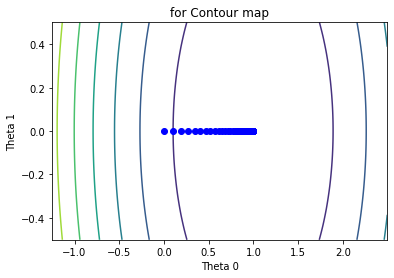

In [126]:
#Q1 part d- showing contours for learning rate 0.001
xlo = -theta[0][0] - 0.25
xhi = theta[0][0] + 1.5
ylo = -theta[1][0] -0.5
yhi = theta[1][0] + 0.5
draw_contours('Contour map', np.asarray(progress), xlo, xhi, ylo, yhi)

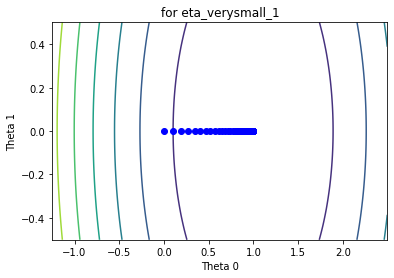

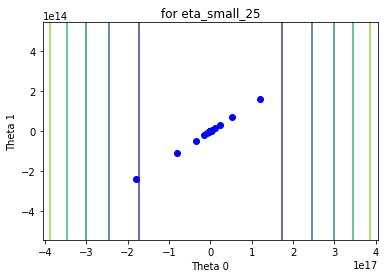

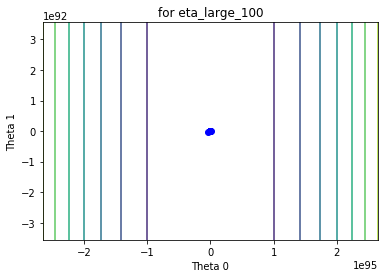

In [117]:
#Q1 part(e) For different learning rates drawing contours and saving video of animation as well
learning_rates = [0.001, 0.025, 0.1]
name = ['eta_verysmall_1', 'eta_small_25', 'eta_large_100']
for i in range(3):
    eta = learning_rates[i]
    theta, progress = learn_model(eta)
    xlo = -theta[0][0] - 0.25
    xhi = theta[0][0] + 1.5
    ylo = -theta[1][0] -0.5
    yhi = theta[1][0] + 0.5
    draw_contours(name[i], np.asarray(progress), xlo, xhi, ylo, yhi)